In [1]:
from access.utils.paths import get_dataset_dir, get_data_filepath, DATA_DIR
from access.utils.utils import read_lines
from access.utils.calc import sentence_fkf, sentence_fkgl, get_corpus_vocab_size, get_corpus_vocab_size_fr, get_avg_token_per_sentence, get_avg_token_per_sentence_fr
from sacrebleu import corpus_bleu, sentence_bleu
from tseval.feature_extraction import get_compression_ratio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="ticks")

In [3]:
with open(get_dataset_dir('wikilarge') / 'wikilarge.train.src', 'r', encoding="utf-8") as f_src:
    src = f_src.readlines()

with open(get_dataset_dir('wikilarge') / 'wikilarge.train.dst', 'r', encoding="utf-8") as f_dst:
    dst = f_dst.readlines()

In [4]:
fkf_ss = []
fkf_ds = []
delta_fkfs = []
fkgl_ss = []
fkgl_ds = []
delta_fkgls = []
ratios = []
for s, d in zip(src, dst):
    s = s.strip()
    d = d.strip()
    try:
        fkf_s = sentence_fkf(s)
        fkf_d = sentence_fkf(d)
        fkgl_s = sentence_fkgl(s)
        fkgl_d = sentence_fkgl(d)
        delta_fkf = abs(fkf_s - fkf_d)
        delta_fkgl = abs(fkgl_s - fkgl_d)
        fkf_ss.append(fkf_s)
        fkf_ds.append(fkf_d)
        delta_fkfs.append(delta_fkf)
        
        fkgl_ss.append(fkgl_s)
        fkgl_ds.append(fkgl_d)
        delta_fkgls.append(delta_fkgl)
        
        compression_ratio = get_compression_ratio(s, d)
        ratios.append(compression_ratio)
    except:
        continue

<AxesSubplot:ylabel='Probability'>

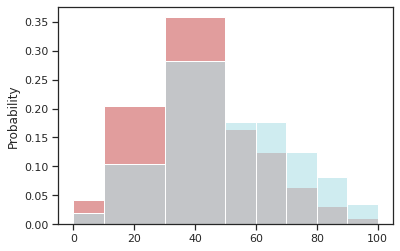

In [5]:
sns.histplot(fkf_ss, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="indianred", alpha=0.6)
sns.histplot(fkf_ds, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="powderblue", alpha=0.6)

<AxesSubplot:ylabel='Probability'>

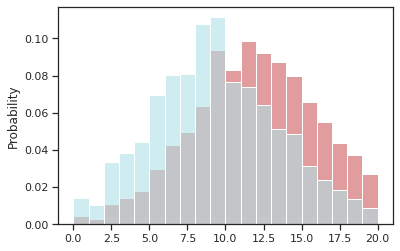

In [6]:
sns.histplot(fkgl_ss, stat="probability", bins=range(21), color="indianred", alpha=0.6)
sns.histplot(fkgl_ds, stat="probability", bins=range(21), color="powderblue", alpha=0.6)

<AxesSubplot:ylabel='Probability'>

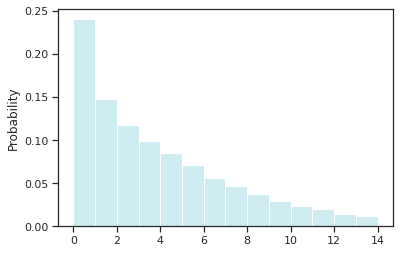

In [7]:
sns.histplot(delta_fkgls, stat="probability", bins=range(15), color="powderblue", alpha=0.6)

<AxesSubplot:ylabel='Probability'>

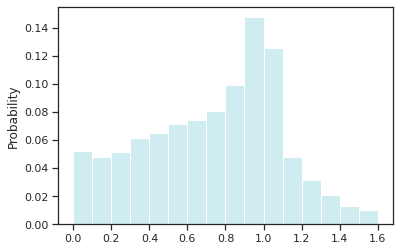

In [8]:
sns.histplot(data=ratios, stat="probability", color="powderblue", bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], alpha=0.6)

In [9]:
print(np.mean(fkf_ss))
print(np.mean(fkf_ds))
print(np.mean(delta_fkfs))
print(np.mean(fkgl_ss))
print(np.mean(fkgl_ds))
print(np.mean(delta_fkgls))
print(np.mean(ratios))

42.380879476306724
50.629688103859536
22.76016704810011
12.603129986086813
9.859608827731721
4.549991779082182
0.8723893327039303


In [10]:
with open(get_dataset_dir('turkcorpus') / 'turkcorpus.valid.complex', 'r', encoding="utf-8") as f_complex:
    src = f_complex.readlines()

ref_filepaths = [get_data_filepath('turkcorpus', 'valid', 'simple.turk', i) for i in range(8)]
refs_sents=[read_lines(ref_filepath) for ref_filepath in ref_filepaths]

In [11]:
fkf_ss = []
fkf_ds = []
delta_fkfs = []
fkgl_ss = []
fkgl_ds = []
delta_fkgls = []
ratios = []
bleus = []
for ref in refs_sents:
    for s, d in zip(src, ref):
        s = s.strip()
        d = d.strip()
        try:
            fkf_s = sentence_fkf(s)
            fkf_d = sentence_fkf(d)
            fkgl_s = sentence_fkgl(s)
            fkgl_d = sentence_fkgl(d)
            delta_fkf = abs(fkf_s - fkf_d)
            delta_fkgl = abs(fkgl_s - fkgl_d)
            fkf_ss.append(fkf_s)
            fkf_ds.append(fkf_d)
            delta_fkfs.append(delta_fkf)

            fkgl_ss.append(fkgl_s)
            fkgl_ds.append(fkgl_d)
            delta_fkgls.append(delta_fkgl)

            compression_ratio = get_compression_ratio(s, d)
            ratios.append(compression_ratio)
            
            bleu = corpus_bleu(s, d, force=True, lowercase=True).score
            bleus.append(bleu)
        except:
            continue

<AxesSubplot:ylabel='Probability'>

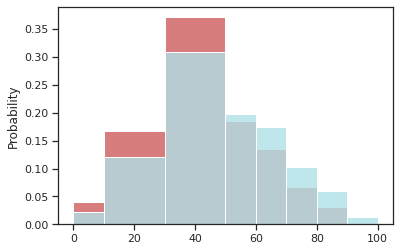

In [12]:
sns.histplot(fkf_ss, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="indianred", alpha=0.8)
sns.histplot(fkf_ds, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

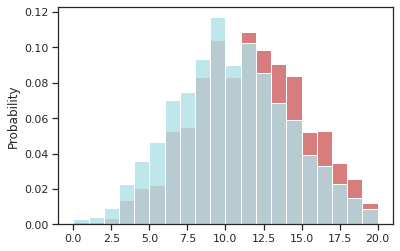

In [13]:
sns.histplot(fkgl_ss, stat="probability", bins=range(21), color="indianred", alpha=0.8)
sns.histplot(fkgl_ds, stat="probability", bins=range(21), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

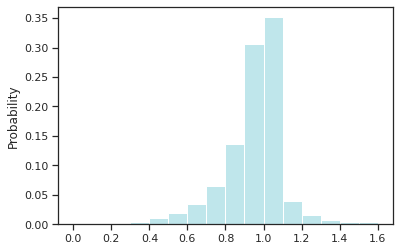

In [14]:
sns.histplot(data=ratios, stat="probability", color="powderblue", bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], alpha=0.8)

<AxesSubplot:ylabel='Probability'>

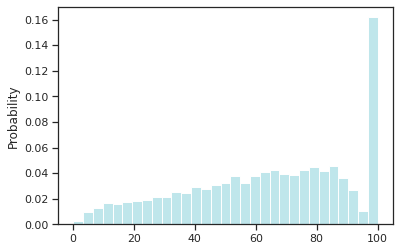

In [15]:
sns.histplot(bleus, stat="probability", color="powderblue", alpha=0.8)

In [16]:
print(np.mean(fkf_ss))
print(np.mean(fkf_ds))
print(np.mean(delta_fkfs))
print(np.mean(fkgl_ss))
print(np.mean(fkgl_ds))
print(np.mean(delta_fkgls))
print(np.mean(ratios))
print(np.mean(bleu))

44.14108636380575
50.589926041698945
9.048082546307473
11.772955431328912
10.5856602373323
1.5825288356575915
0.9464895134517867
25.89451141492935


In [17]:
with open(get_dataset_dir('para') / 'para.train.src', 'r', encoding="utf-8") as f_src:
    src = f_src.readlines()

with open(get_dataset_dir('para') / 'para.train.dst', 'r', encoding="utf-8") as f_dst:
    dst = f_dst.readlines()

In [18]:
fkf_ss = []
fkf_ds = []
delta_fkfs = []
fkgl_ss = []
fkgl_ds = []
delta_fkgls = []
ratios = []
for s, d in zip(src, dst):
    s = s.strip()
    d = d.strip()
    try:
        fkf_s = sentence_fkf(s)
        fkf_d = sentence_fkf(d)
        fkgl_s = sentence_fkgl(s)
        fkgl_d = sentence_fkgl(d)
        delta_fkf = abs(fkf_s - fkf_d)
        delta_fkgl = abs(fkgl_s - fkgl_d)
        fkf_ss.append(fkf_s)
        fkf_ds.append(fkf_d)
        delta_fkfs.append(delta_fkf)
        
        fkgl_ss.append(fkgl_s)
        fkgl_ds.append(fkgl_d)
        delta_fkgls.append(delta_fkgl)
        
        compression_ratio = get_compression_ratio(s, d)
        ratios.append(compression_ratio)
    except:
        continue

<AxesSubplot:ylabel='Probability'>

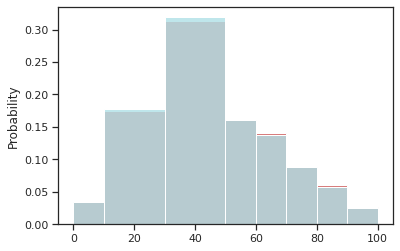

In [19]:
sns.histplot(fkf_ss, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="indianred", alpha=0.8)
sns.histplot(fkf_ds, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

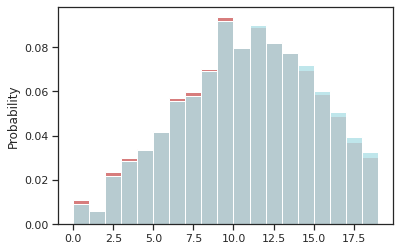

In [20]:
sns.histplot(fkgl_ss, stat="probability", bins=range(20), color="indianred", alpha=0.8)
sns.histplot(fkgl_ds, stat="probability", bins=range(20), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

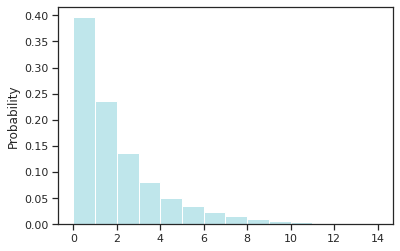

In [21]:
sns.histplot(delta_fkgls, stat="probability", bins=range(15), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

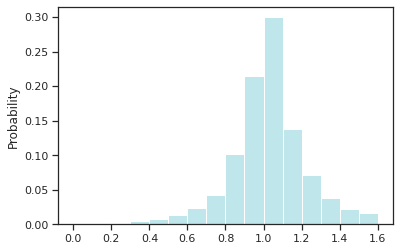

In [22]:
sns.histplot(data=ratios, stat="probability", color="powderblue", bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], alpha=0.8)

In [23]:
print(np.mean(fkf_ss))
print(np.mean(fkf_ds))
print(np.mean(delta_fkfs))
print(np.mean(fkgl_ss))
print(np.mean(fkgl_ds))
print(np.mean(delta_fkgls))
print(np.mean(ratios))

48.216395797107396
47.66504088419591
12.633193642724507
11.154942326917332
11.415694512066494
2.120047665278314
1.1177903371227802


In [24]:
with open(DATA_DIR / 'complex_trans.csv', 'r', encoding="utf-8") as f_src:
    src = f_src.readlines()
    
with open(DATA_DIR / 'simple_trans.csv', 'r', encoding="utf-8") as f_dst:
    dst = f_dst.readlines()

In [25]:
print("number of different words in complex set:", get_corpus_vocab_size(src))
print("number of different words in simple set:", get_corpus_vocab_size(dst))
print("avg words per sentence in complex set:", get_avg_token_per_sentence(src))
print("avg words per sentence in simple set:", get_avg_token_per_sentence(dst))
print("num of total samples:", len(src))

number of different words in complex set: 196301
number of different words in simple set: 165130
avg words per sentence in complex set: 18.95276928845744
avg words per sentence in simple set: 19.36424861958341
num of total samples: 816058


In [26]:
fkf_ss = []
fkf_ds = []
delta_fkfs = []
fkgl_ss = []
fkgl_ds = []
delta_fkgls = []
ratios = []
bleus = []
for s, d in zip(src, dst):
    s = s.strip()
    d = d.strip()
    try:
        fkf_s = sentence_fkf(s)
        fkf_d = sentence_fkf(d)
        fkgl_s = sentence_fkgl(s)
        fkgl_d = sentence_fkgl(d)
        delta_fkf = abs(fkf_s - fkf_d)
        delta_fkgl = abs(fkgl_s - fkgl_d)
        fkf_ss.append(fkf_s)
        fkf_ds.append(fkf_d)
        delta_fkfs.append(delta_fkf)
        
        fkgl_ss.append(fkgl_s)
        fkgl_ds.append(fkgl_d)
        delta_fkgls.append(delta_fkgl)
        
        compression_ratio = get_compression_ratio(s, d)
        ratios.append(compression_ratio)
        
        bleu = corpus_bleu(s, d, force=True, lowercase=True).score
        bleus.append(bleu)
    except:
        continue

<AxesSubplot:ylabel='Probability'>

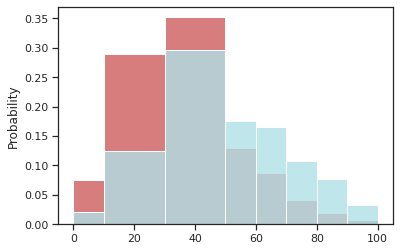

In [27]:
sns.histplot(fkf_ss, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="indianred", alpha=0.8)
sns.histplot(fkf_ds, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

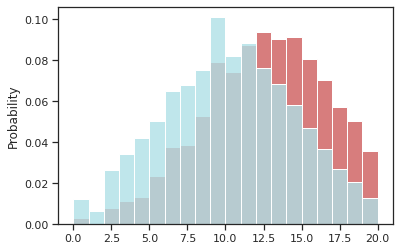

In [28]:
sns.histplot(fkgl_ss, stat="probability", bins=range(21), color="indianred", alpha=0.8)
sns.histplot(fkgl_ds, stat="probability", bins=range(21), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

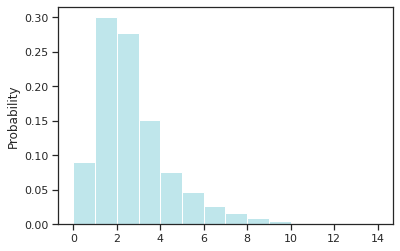

In [29]:
sns.histplot(delta_fkgls, stat="probability", bins=range(15), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

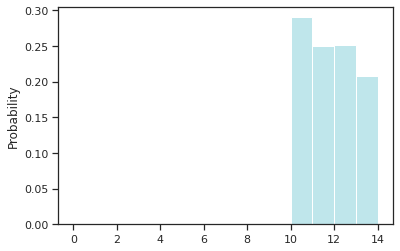

In [30]:
sns.histplot(delta_fkfs, stat="probability", bins=range(15), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

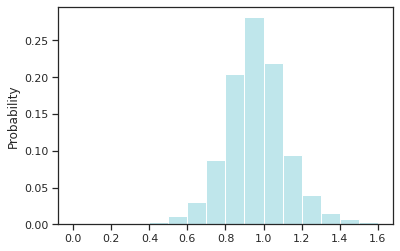

In [31]:
sns.histplot(data=ratios, stat="probability", color="powderblue", bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], alpha=0.8)

<AxesSubplot:ylabel='Probability'>

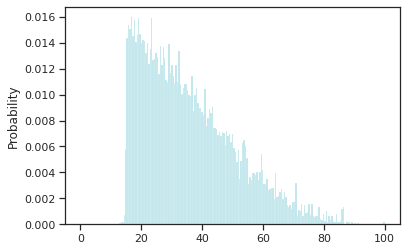

In [32]:
sns.histplot(bleus, stat="probability", color="powderblue", alpha=0.8)

<AxesSubplot:>

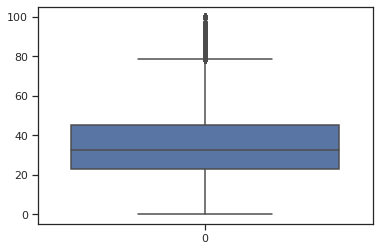

In [33]:
sns.boxplot(data=bleus)

In [34]:
print(np.mean(fkf_ss))
print(np.mean(fkf_ds))
print(np.mean(delta_fkfs))
print(np.mean(fkgl_ss))
print(np.mean(fkgl_ds))
print(np.mean(delta_fkgls))
print(np.mean(ratios))

34.5962485471986
53.31987532964889
18.723626782450282
13.107387270003144
10.341081883024257
2.7822333186956234
0.9629878586401137


In [35]:
import pickle
f = open("./data/ppls.pickle", "rb")
ppls = pickle.load(f)
f.close()

In [36]:
ppls = pd.DataFrame(ppls)
ppls.rename(columns={'0':'ppl'})
ppls = ppls.sample(frac=0.001)
len(ppls)

3969

In [37]:
np.mean(ppls)

0    96.577009
dtype: float64

<AxesSubplot:ylabel='Count'>

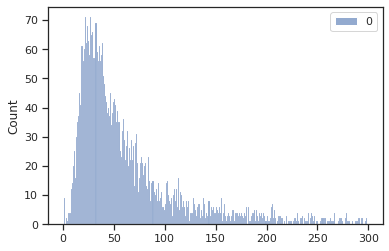

In [38]:
sns.histplot(data=ppls, bins=range(0,300), color="powderblue", alpha=0.6)

In [39]:
from access.utils.paths import DATA_DIR
from access.utils.calc import sentence_fkf_de
from tqdm import tqdm
import linecache

para_data = DATA_DIR / 'de-en_trans_result'/ 'generate-test.txt'
en_row = DATA_DIR / 'wmt_en_de' / 'train.en'
de_row = DATA_DIR / 'wmt_en_de' / 'train.de'

lenfile = sum([1 for i in open(para_data, "r")])

delta_fkfs = []
multilingual_delta_fkfs = []
model_delta_fkfs = []

with open(para_data, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=lenfile):
        if line.startswith('S'):
            no = int(line.strip().split('\t')[0][2:])
            pair_generated = {}
            row_line_de = linecache.getline(str(de_row), no+1).strip()
            pair_generated['ss'] = row_line_de
        elif line.startswith('T'):
            no = int(line.strip().split('\t')[0][2:])
            row_line_en = linecache.getline(str(en_row), no+1).strip()
            pair_generated['ts'] = row_line_en
        elif line.startswith('H'):
            pass
        elif line.startswith("D"):
            pair_generated['ds'] = line.strip().split('\t')[-1]
        elif line.startswith("P"):
            try:
                ts_fkf = sentence_fkf(pair_generated['ts'])
                ds_fkf = sentence_fkf(pair_generated['ds'])
                ss_fkf = sentence_fkf_de(pair_generated['ss'])
                delta_fkfs.append(ts_fkf-ds_fkf)
                multilingual_delta_fkfs.append(ts_fkf-ss_fkf)
                model_delta_fkfs.append(ss_fkf-ds_fkf)
            except:
                pass
        else:
            pass

100%|██████████| 17753928/17753928 [27:37<00:00, 10712.02it/s]


In [40]:
d_fkfs = pd.DataFrame({'translation_delta_fkf':delta_fkfs, 'bilingual_delta_fkf':multilingual_delta_fkfs, 'model_delta_fkf':model_delta_fkfs})
# d_fkfs = d_fkfs.sample(frac=0.001, axis=0)

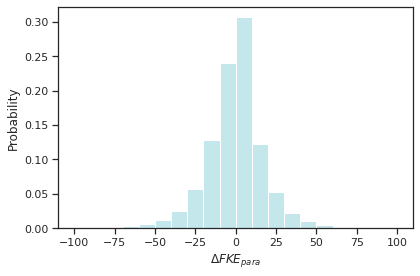

In [41]:
sns_plot = sns.histplot(d_fkfs["translation_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FKE_{para}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/translation_delta_fkf.png', dpi=400)

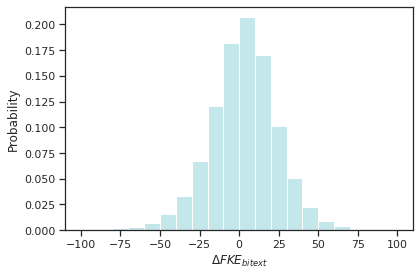

In [42]:
sns_plot = sns.histplot(d_fkfs["bilingual_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FKE_{bitext}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/bilingual_delta_fkf.png', dpi=400)

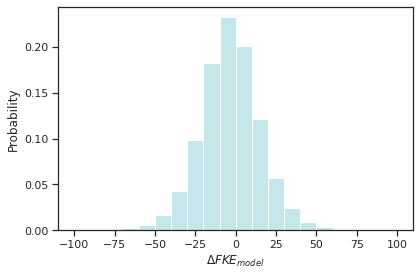

In [43]:
sns_plot = sns.histplot(d_fkfs["model_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FKE_{model}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/model_delta_fkf.png', dpi=400)

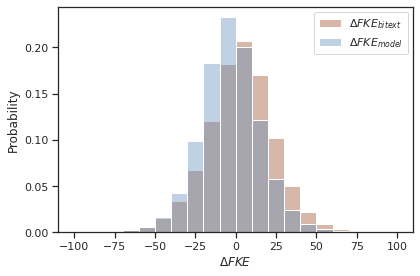

In [44]:
sns_plot = sns.histplot(d_fkfs["bilingual_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#9F4926", stat="probability", alpha=0.4)
sns_plot = sns.histplot(d_fkfs["model_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#5F8CB9", stat="probability", alpha=0.4)
sns_plot.set_xlabel('$\Delta FKE$')
sns_plot.legend(["$\Delta FKE_{bitext}$","$\Delta FKE_{model}$"])
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/biligual&model_delta.png', dpi=400)

In [45]:
from access.utils.paths import DATA_DIR
from access.utils.calc import sentence_fkf_fr
from tqdm import tqdm
import linecache

para_data = DATA_DIR / 'en-fr_trans_result'/ 'generate-test.txt'
en_row = DATA_DIR / 'europarl_en_fr' / 'europarl-v7.fr-en.en'
fr_row = DATA_DIR / 'europarl_en_fr' / 'europarl-v7.fr-en.fr'

lenfile = sum([1 for i in open(para_data, "r")])

delta_fkfs = []
multilingual_delta_fkfs = []
model_delta_fkfs = []

with open(para_data, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=lenfile):
        if line.startswith('S'):
            no = int(line.strip().split('\t')[0][2:])
            pair_generated = {}
            row_line_en = linecache.getline(str(en_row), no+1).strip()
            pair_generated['ss'] = row_line_en
        elif line.startswith('T'):
            no = int(line.strip().split('\t')[0][2:])
            row_line_fr = linecache.getline(str(fr_row), no+1).strip()
            pair_generated['ts'] = row_line_fr
        elif line.startswith('H'):
            pass
        elif line.startswith("D"):
            pair_generated['ds'] = line.strip().split('\t')[-1]
        elif line.startswith("P"):
            try:
                ts_fkf = sentence_fkf_fr(pair_generated['ts'])
                ds_fkf = sentence_fkf_fr(pair_generated['ds'])
                ss_fkf = sentence_fkf(pair_generated['ss'])
                delta_fkfs.append(ts_fkf-ds_fkf)
                multilingual_delta_fkfs.append(ts_fkf-ss_fkf)
                model_delta_fkfs.append(ss_fkf-ds_fkf)
            except:
                pass
        else:
            pass

100%|██████████| 10038612/10038612 [17:46<00:00, 9415.80it/s]


In [46]:
d_fkfs = pd.DataFrame({'translation_delta_fkf':delta_fkfs, 'bilingual_delta_fkf':multilingual_delta_fkfs, 'model_delta_fkf':model_delta_fkfs})
# d_fkfs = d_fkfs.sample(frac=0.001, axis=0)

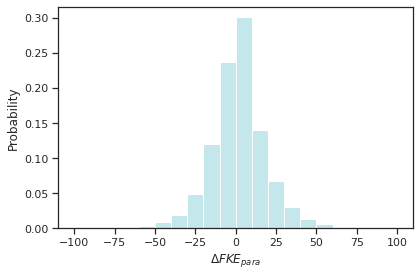

In [47]:
sns_plot = sns.histplot(d_fkfs["translation_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FKE_{para}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/translation_delta_fkf_fr.png', dpi=400)

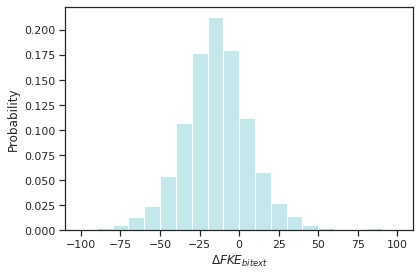

In [48]:
sns_plot = sns.histplot(d_fkfs["bilingual_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FKE_{bitext}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/bilingual_delta_fkf_fr.png', dpi=400)

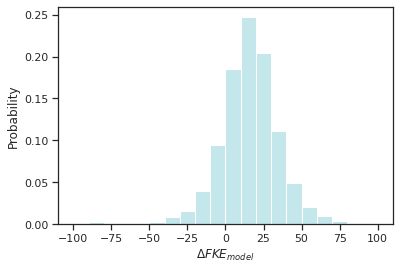

In [49]:
sns_plot = sns.histplot(d_fkfs["model_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FKE_{model}$')
sns_plot = sns_plot.get_figure()
sns_plot.savefig('./plots/model_delta_fkf_fr.png', dpi=400)

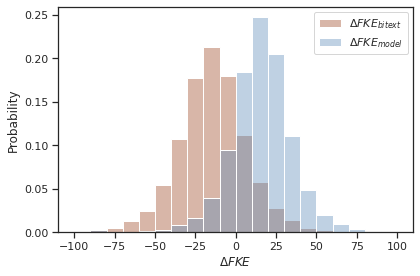

In [50]:
sns_plot = sns.histplot(d_fkfs["bilingual_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#9F4926", stat="probability", alpha=0.4)
sns_plot = sns.histplot(d_fkfs["model_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#5F8CB9", stat="probability", alpha=0.4)
sns_plot.set_xlabel('$\Delta FKE$')
sns_plot.legend(["$\Delta FKE_{bitext}$","$\Delta FKE_{model}$"])
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/biligual&model_delta_fr.png', dpi=400)

In [51]:
with open(DATA_DIR / 'complex_trans_fr.csv', 'r', encoding="utf-8") as f_src:
    src = f_src.readlines()
    
with open(DATA_DIR / 'simple_trans_fr.csv', 'r', encoding="utf-8") as f_dst:
    dst = f_dst.readlines()

In [52]:
print("number of different words in complex set:", get_corpus_vocab_size_fr(src))
print("number of different words in simple set:", get_corpus_vocab_size_fr(dst))
print("avg words per sentence in complex set:", get_avg_token_per_sentence_fr(src))
print("avg words per sentence in simple set:", get_avg_token_per_sentence_fr(dst))
print("num of total samples:", len(src))

number of different words in complex set: 118505
number of different words in simple set: 110429
avg words per sentence in complex set: 26.313393020636234
avg words per sentence in simple set: 27.467798542867765
num of total samples: 720868


In [53]:
from access.utils.paths import DATA_DIR
from access.utils.calc import sentence_fkf_es, get_corpus_vocab_size_es, get_avg_token_per_sentence_es
from tqdm import tqdm

para_data = DATA_DIR / 'en-es_trans_result'/ 'generate-test.txt'

delta_fkfs = []
multilingual_delta_fkfs = []
model_delta_fkfs = []
            
lenfile = sum([1 for i in open(para_data, "r")])

with open(para_data, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=lenfile):
        cells = line.strip().split('\t')
        try:
            ds = cells[0]
            ts = cells[1]
            ss = cells[2]
            ts_fkf = sentence_fkf_es(ts.strip())
            ss_fkf = sentence_fkf(ss.strip())
            ds_fkf = sentence_fkf_es(ds.strip())
            delta_fkfs.append(ts_fkf-ds_fkf)
            multilingual_delta_fkfs.append(ts_fkf-ss_fkf)
            model_delta_fkfs.append(ss_fkf-ds_fkf)
        except:
            continue

100%|██████████| 1964224/1964224 [16:20<00:00, 2003.00it/s]


In [54]:
d_fkfs = pd.DataFrame({'translation_delta_fkf':delta_fkfs, 'bilingual_delta_fkf':multilingual_delta_fkfs, 'model_delta_fkf':model_delta_fkfs})

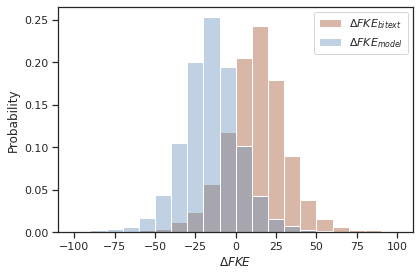

In [55]:
sns_plot = sns.histplot(d_fkfs["bilingual_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#9F4926", stat="probability", alpha=0.4)
sns_plot = sns.histplot(d_fkfs["model_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#5F8CB9", stat="probability", alpha=0.4)
sns_plot.set_xlabel('$\Delta FKE$')
sns_plot.legend(["$\Delta FKE_{bitext}$","$\Delta FKE_{model}$"])
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/biligual&model_delta_es.png', dpi=400)

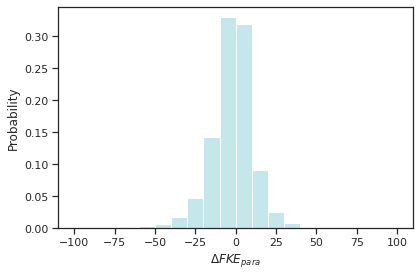

In [56]:
sns_plot = sns.histplot(d_fkfs["translation_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FKE_{para}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/translation_delta_fkf_es.png', dpi=400)

In [57]:
with open(DATA_DIR / 'complex_trans_es.csv', 'r', encoding="utf-8") as f_src:
    src = f_src.readlines()
    
with open(DATA_DIR / 'simple_trans_es.csv', 'r', encoding="utf-8") as f_dst:
    dst = f_dst.readlines()

In [58]:
print("number of different words in complex set:", get_corpus_vocab_size_es(src))
print("number of different words in simple set:", get_corpus_vocab_size_es(dst))
print("avg words per sentence in complex set:", get_avg_token_per_sentence_es(src))
print("avg words per sentence in simple set:", get_avg_token_per_sentence_es(dst))
print("num of total samples:", len(src))

number of different words in complex set: 119876
number of different words in simple set: 104361
avg words per sentence in complex set: 27.997448048833483
avg words per sentence in simple set: 25.79146561937597
num of total samples: 487862


In [59]:
fkf_ss = []
fkf_ds = []
delta_fkfs = []
fkgl_ss = []
fkgl_ds = []
delta_fkgls = []
ratios = []
bleus = []
for s, d in zip(src, dst):
    s = s.strip()
    d = d.strip()
    try:
        fkf_s = sentence_fkf_fr(s)
        fkf_d = sentence_fkf_fr(d)
        delta_fkf = abs(fkf_s - fkf_d)
        fkf_ss.append(fkf_s)
        fkf_ds.append(fkf_d)
        delta_fkfs.append(delta_fkf)
        
        compression_ratio = get_compression_ratio(s, d)
        ratios.append(compression_ratio)
        
        bleu = corpus_bleu(s, d, force=True, lowercase=True).score
        bleus.append(bleu)
    except:
        continue

<AxesSubplot:ylabel='Probability'>

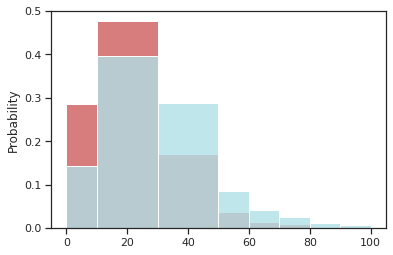

In [60]:
sns.histplot(fkf_ss, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="indianred", alpha=0.8)
sns.histplot(fkf_ds, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

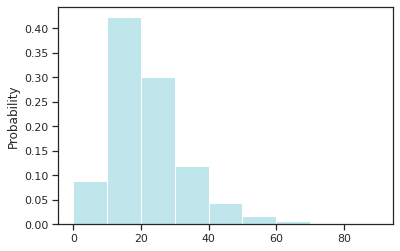

In [61]:
sns.histplot(delta_fkfs, stat="probability", bins=range(0,100,10), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

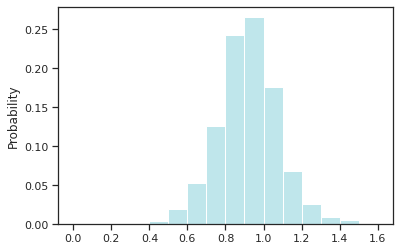

In [62]:
sns.histplot(data=ratios, stat="probability", color="powderblue", bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], alpha=0.8)

<AxesSubplot:ylabel='Probability'>

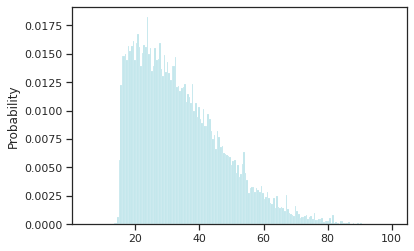

In [63]:
sns.histplot(bleus, stat="probability", color="powderblue", alpha=0.8)

In [64]:
print(np.mean(fkf_ss))
print(np.mean(fkf_ds))
print(np.mean(delta_fkfs))
print(np.mean(ratios))

3.087288488157287
25.082449389212105
22.102772068308536
0.9212921607007498
